In [2]:
# importing required libraries

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential

from keras.layers import Dense, Dropout, LSTM

import pandas as pd

data=pd.read_csv('test1.csv')


In [3]:
data.head()

,Unnamed: 0,timestamp,value,label,KPI ID
0,2419077,1491041280,199.34,0,6d1114ae-be04-3c46-b5aa-be1a003a57cd
1,2419078,1491041340,199.73,0,6d1114ae-be04-3c46-b5aa-be1a003a57cd
2,2419079,1491041400,198.11,0,6d1114ae-be04-3c46-b5aa-be1a003a57cd
3,2419080,1491041460,191.34,0,6d1114ae-be04-3c46-b5aa-be1a003a57cd
4,2419081,1491041520,187.99,0,6d1114ae-be04-3c46-b5aa-be1a003a57cd


In [4]:
data.drop(['Unnamed: 0','label','KPI ID'],axis=1,inplace=True)

In [6]:
data.drop('timestamp',axis=1,inplace=True)

In [32]:
dataset=list(data.value[:1700])
train=list(data.value[:1400])
valid=list(data.value[1400:1700])

In [44]:
import numpy as np
dataset1=[]
for i in range(len(dataset)):
    dataset1.append([dataset[i]])
dataset1=np.array(dataset1)

In [45]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)



In [47]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset1)


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [48]:
# use this function to prepare the train and test datasets for modeling
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [50]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [51]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 0.0048
Epoch 2/100
 - 2s - loss: 0.0027
Epoch 3/100
 - 2s - loss: 0.0024
Epoch 4/100
 - 2s - loss: 0.0024
Epoch 5/100
 - 2s - loss: 0.0023
Epoch 6/100
 - 2s - loss: 0.0022
Epoch 7/100
 - 2s - loss: 0.0022
Epoch 8/100
 - 2s - loss: 0.0022
Epoch 9/100
 - 2s - loss: 0.0021
Epoch 10/100
 - 2s - loss: 0.0022
Epoch 11/100
 - 2s - loss: 0.0021
Epoch 12/100
 - 2s - loss: 0.0021
Epoch 13/100
 - 2s - loss: 0.0020
Epoch 14/100
 - 2s - loss: 0.0020
Epoch 15/100
 - 2s - loss: 0.0019
Epoch 16/100
 - 2s - loss: 0.0020
Epoch 17/100
 - 2s - loss: 0.0019
Epoch 18/100
 - 2s - loss: 0.0020
Epoch 19/100
 - 2s - loss: 0.0019
Epoch 20/100
 - 2s - loss: 0.0019
Epoch 21/100
 - 2s - loss: 0.0019
Epoch 22/100
 - 2s - loss: 0.0019
Epoch 23/100
 - 2s - loss: 0.0020
Epoch 24/100
 - 2s - loss: 0.0019
Epoch 25/100
 - 2s - loss: 0.0018
Epoch 26/100
 - 2s - loss: 0.0020
Epoch 27/100
 - 2s - loss: 0.0019
Epoch 28/100
 - 2s - loss: 0.0019
Epoch 29/

In [52]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

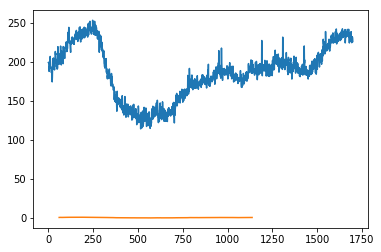

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
plt.show()

In [57]:
scaled_data

array([[0., 0., 0., ..., 0., 0., 0.]])

In [58]:
x_train, y_train = [], []

for i in range(60,len(train)):

    x_train.append(dataset1[i-60:i,0])

    y_train.append(dataset1[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

 

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))



In [60]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))

model.add(LSTM(units=50))

model.add(Dense(1))

 

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)



Epoch 1/1
 - 73s - loss: 21779.2588


In [61]:
#predicting 246 values, using past 60 from the train data

inputs = new_data[len(new_data) - len(valid) - 60:].values

inputs = inputs.reshape(-1,1)

inputs  = scaler.transform(inputs)

NameError: name 'new_data' is not defined